World Happiness Report Project  

Project Description  

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?  

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?  

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?  

The following columns:   
GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset.
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.  

Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData


The data is of 2015


In [ ]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Lets have a look at the data

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df.duplicated().sum() # No Duplicate Values

0

In [ ]:
df.isnull().sum().sum() # No missing values

0

# **Univariate Analysis**

## *Lets look at Region Column*

In [ ]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
df.Region.nunique()

10

*Has 10 Regions*

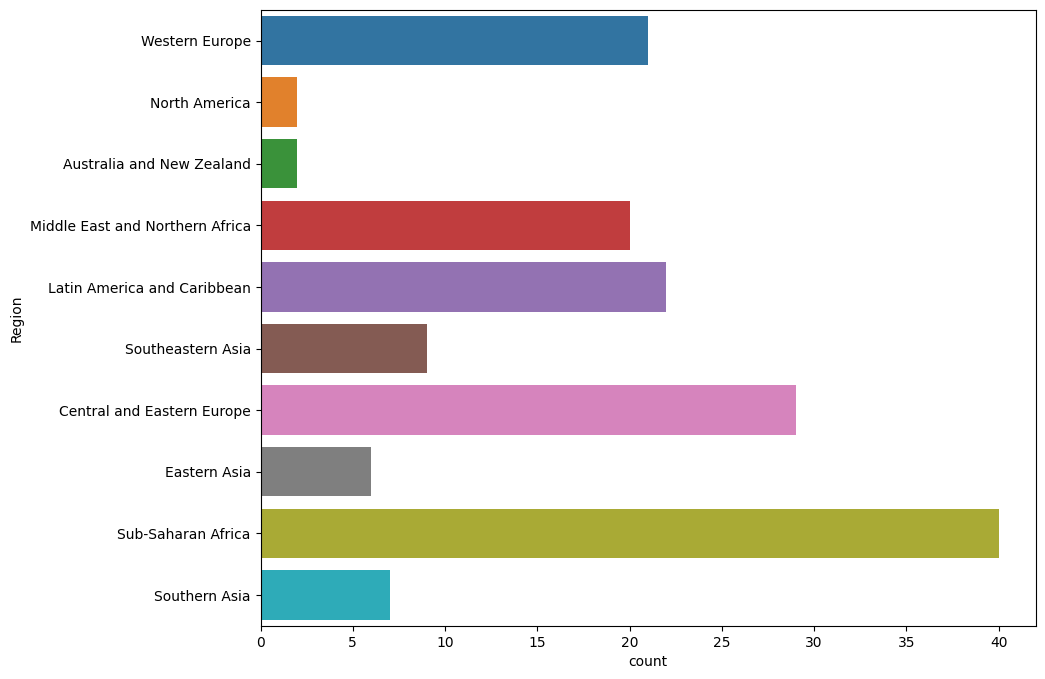

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df,y='Region')
plt.show()


In [ ]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

#### **In this Data**
- `Sub-Saharan African` region has most countries i.e 40
- Both `North America` and `Australia and New Zealand` region has least countries of 2 each

### *Lets look at the Happiness score column*

<Axes: xlabel='Happiness Score', ylabel='Count'>

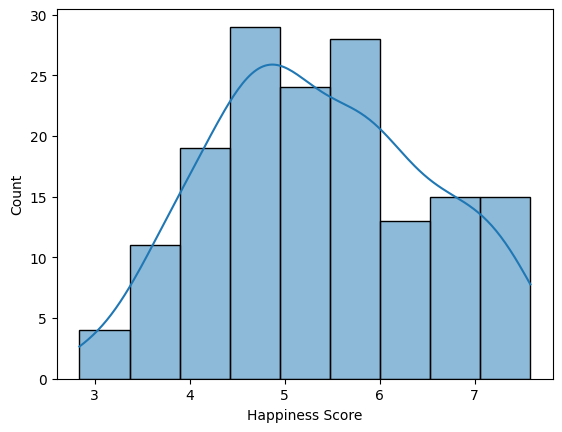

In [ ]:
sns.histplot(df['Happiness Score'],kde=True)

In [ ]:
df['Happiness Score'].min()

2.839

In [ ]:
df['Happiness Score'].max()

7.587

- Happiness score is between 2.839 to 7.587 on a scale of 0 to 10
- Happiness score of around 5 is given to most of the countries on an average

## *Lets look at Economy column*

In [ ]:
df['Economy (GDP per Capita)'].values

array([1.39651, 1.30232, 1.32548, 1.459  , 1.32629, 1.29025, 1.32944,
       1.33171, 1.25018, 1.33358, 1.22857, 0.95578, 1.33723, 1.02054,
       1.39451, 0.98124, 1.56391, 1.33596, 1.30782, 1.42727, 1.26637,
       1.36011, 1.04424, 1.52186, 1.06353, 1.32792, 1.10715, 1.69042,
       1.27778, 1.05351, 1.17898, 1.06166, 0.91861, 0.9669 , 1.39541,
       1.23011, 1.2074 , 1.29098, 1.55422, 0.99534, 1.21183, 0.76454,
       0.74553, 0.63244, 1.16891, 1.27074, 1.24461, 0.86402, 1.32376,
       1.25114, 0.68133, 0.59448, 0.75985, 1.12254, 1.18498, 1.14723,
       0.59325, 0.90019, 1.03192, 1.12555, 1.12486, 1.08254, 1.13145,
       1.13764, 0.81038, 1.20806, 1.20813, 0.93929, 0.80148, 0.95847,
       1.00761, 1.38604, 1.15174, 0.82827, 0.63216, 1.06098, 0.47428,
       0.65435, 0.77042, 1.02389, 0.59543, 0.90198, 0.97438, 0.89012,
       0.47038, 1.04345, 0.92053, 1.15991, 1.11312, 0.70532, 0.18847,
       0.73479, 0.91851, 0.08308, 0.87867, 0.83223, 0.37545, 0.89537,
       0.59066, 0.82

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Count'>

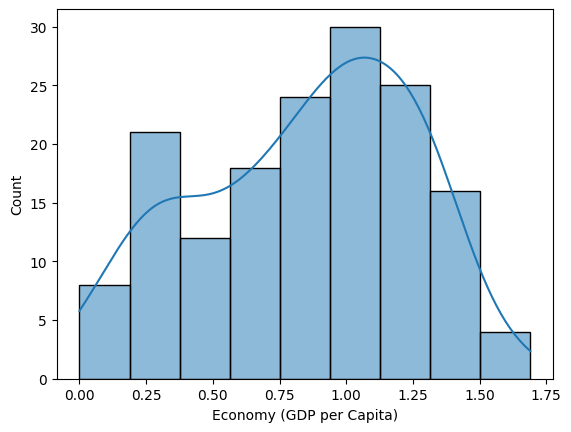

In [ ]:
sns.histplot(df,x='Economy (GDP per Capita)',kde = True)

In [ ]:
df['Economy (GDP per Capita)'].values.min()

0.0

In [ ]:
df['Economy (GDP per Capita)'].values.max()

1.69042

In [ ]:
df[df['Economy (GDP per Capita)']==0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [ ]:
df[df['Economy (GDP per Capita)']==1.69042]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.0786,0.79733,0.6404,0.52208,0.32573,1.55674


- GDP per capita ranges from 0 to 1.69042

## *Lets look at Family column*


In [ ]:
df.Family.values

array([1.34951, 1.40223, 1.36058, 1.33095, 1.32261, 1.31826, 1.28017,
       1.28907, 1.31967, 1.30923, 1.22393, 1.23788, 1.29704, 0.91451,
       1.24711, 1.23287, 1.21963, 1.36948, 1.28566, 1.12575, 1.28548,
       1.08182, 1.25596, 1.02   , 1.1985 , 1.29937, 1.12447, 1.0786 ,
       1.26038, 1.24823, 1.20643, 1.2089 , 1.24018, 1.26504, 1.08393,
       1.31379, 1.30203, 1.07617, 1.16594, 0.972  , 1.18354, 1.02507,
       1.04356, 1.34043, 1.26999, 1.25712, 0.95774, 0.99903, 1.21624,
       1.19777, 0.97841, 1.01528, 1.30477, 1.12241, 1.27385, 1.25745,
       1.14184, 0.97459, 1.23289, 1.27948, 1.07023, 0.79624, 1.11862,
       1.23617, 1.15102, 1.07008, 0.89318, 1.07772, 0.81198, 1.22668,
       0.98521, 1.05818, 1.22791, 1.08708, 0.91226, 0.94632, 1.15115,
       0.90432, 1.10395, 0.93793, 0.41411, 1.05392, 0.90557, 0.94675,
       0.91612, 0.88588, 1.00964, 1.13935, 1.09562, 1.03516, 0.95152,
       0.64095, 1.00232, 1.02626, 0.80434, 0.91916, 1.04103, 1.17202,
       0.73803, 1.30

<Axes: xlabel='Family', ylabel='Count'>

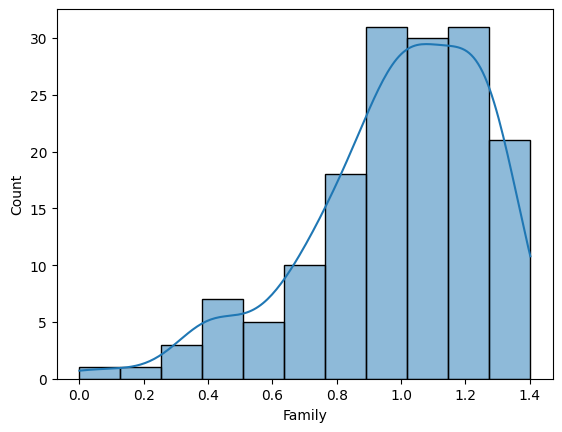

In [ ]:
sns.histplot(df,x='Family',kde = True)

In [ ]:
print(df.Family.max())
print(df.Family.min())

1.40223
0.0


In [ ]:
df[df['Family']==0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


In [ ]:
df[df['Family']==1.40223]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201


- Family has values ranging from 0 (people living alone) to 1.40223 (1+ means people living with their Family)

## *Lets look at health Column*

- I think this health feature tells about the reliability on the healthcare infrastructure of countries

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

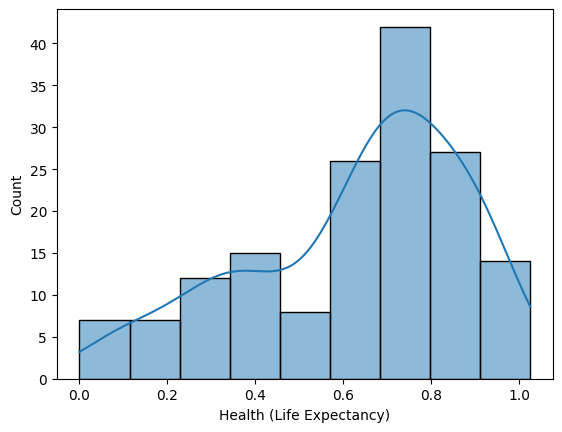

In [ ]:
sns.histplot(df,x='Health (Life Expectancy)',kde = True)

In [ ]:
df['Health (Life Expectancy)'].max()

1.02525

In [ ]:
df['Health (Life Expectancy)'].min()

0.0

In [ ]:
df[df['Health (Life Expectancy)']==0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [ ]:
df[df['Health (Life Expectancy)']==1.02525]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,0.0378,1.52186,1.02,1.02525,0.54252,0.4921,0.31105,1.88501


- Health ranges from 0(No health Care) to 1.02525(Robust Healthcare Infra)

## *Lets look at Freedom Column*

<Axes: xlabel='Freedom', ylabel='Count'>

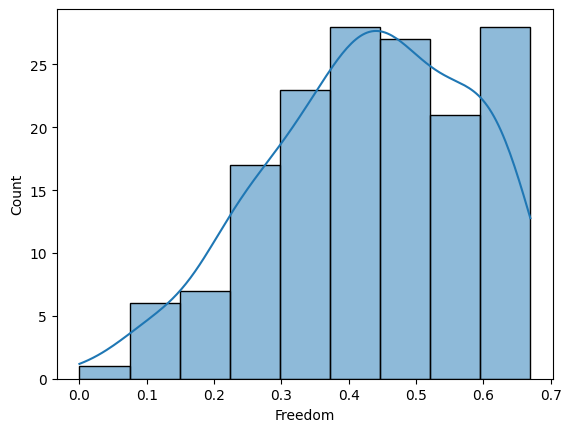

In [ ]:
sns.histplot(df,x='Freedom',kde = True)

In [ ]:
print(df.Freedom.max())
print(df.Freedom.min())

0.66973
0.0


In [ ]:
df[df['Freedom']==0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [ ]:
df[df['Freedom']==0.66973]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


- Values of Freedom ranges from 0 (A military state or Dictator State) to 0.66973 (Democratic state)


## *Lets look at Trust column*

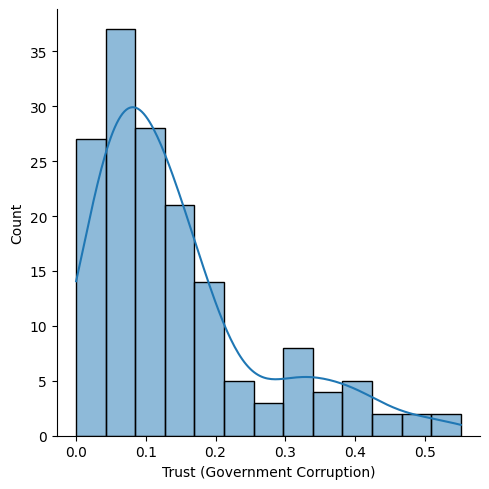

In [ ]:
sns.displot(df,x='Trust (Government Corruption)',kde = True)


In [ ]:
df[df['Trust (Government Corruption)'] == df['Trust (Government Corruption)'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [ ]:
df[df['Trust (Government Corruption)'] == df['Trust (Government Corruption)'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042


## *Lets take a look at Generosity Column*

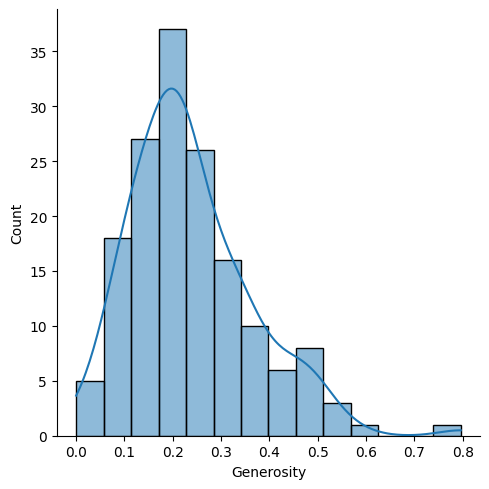

In [ ]:
sns.displot(df,x='Generosity',kde = True)

In [ ]:
df[df['Generosity'] == df['Generosity'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


In [ ]:
df[df['Generosity'] == df['Generosity'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805


- Value of Generosity ranges from 0 to 0.79588

## *lets look at Dystopia Residual Column*

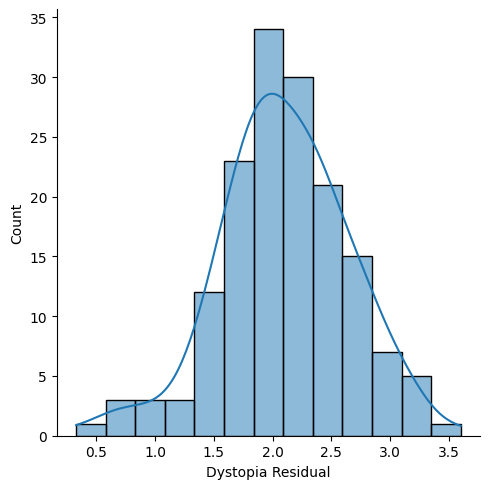

In [ ]:
sns.displot(df,x='Dystopia Residual',kde = True)

In [ ]:
df[df['Dystopia Residual'] == df['Dystopia Residual'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.6632,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [ ]:
df[df['Dystopia Residual'] == df['Dystopia Residual'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214


# Bivariate Analysis

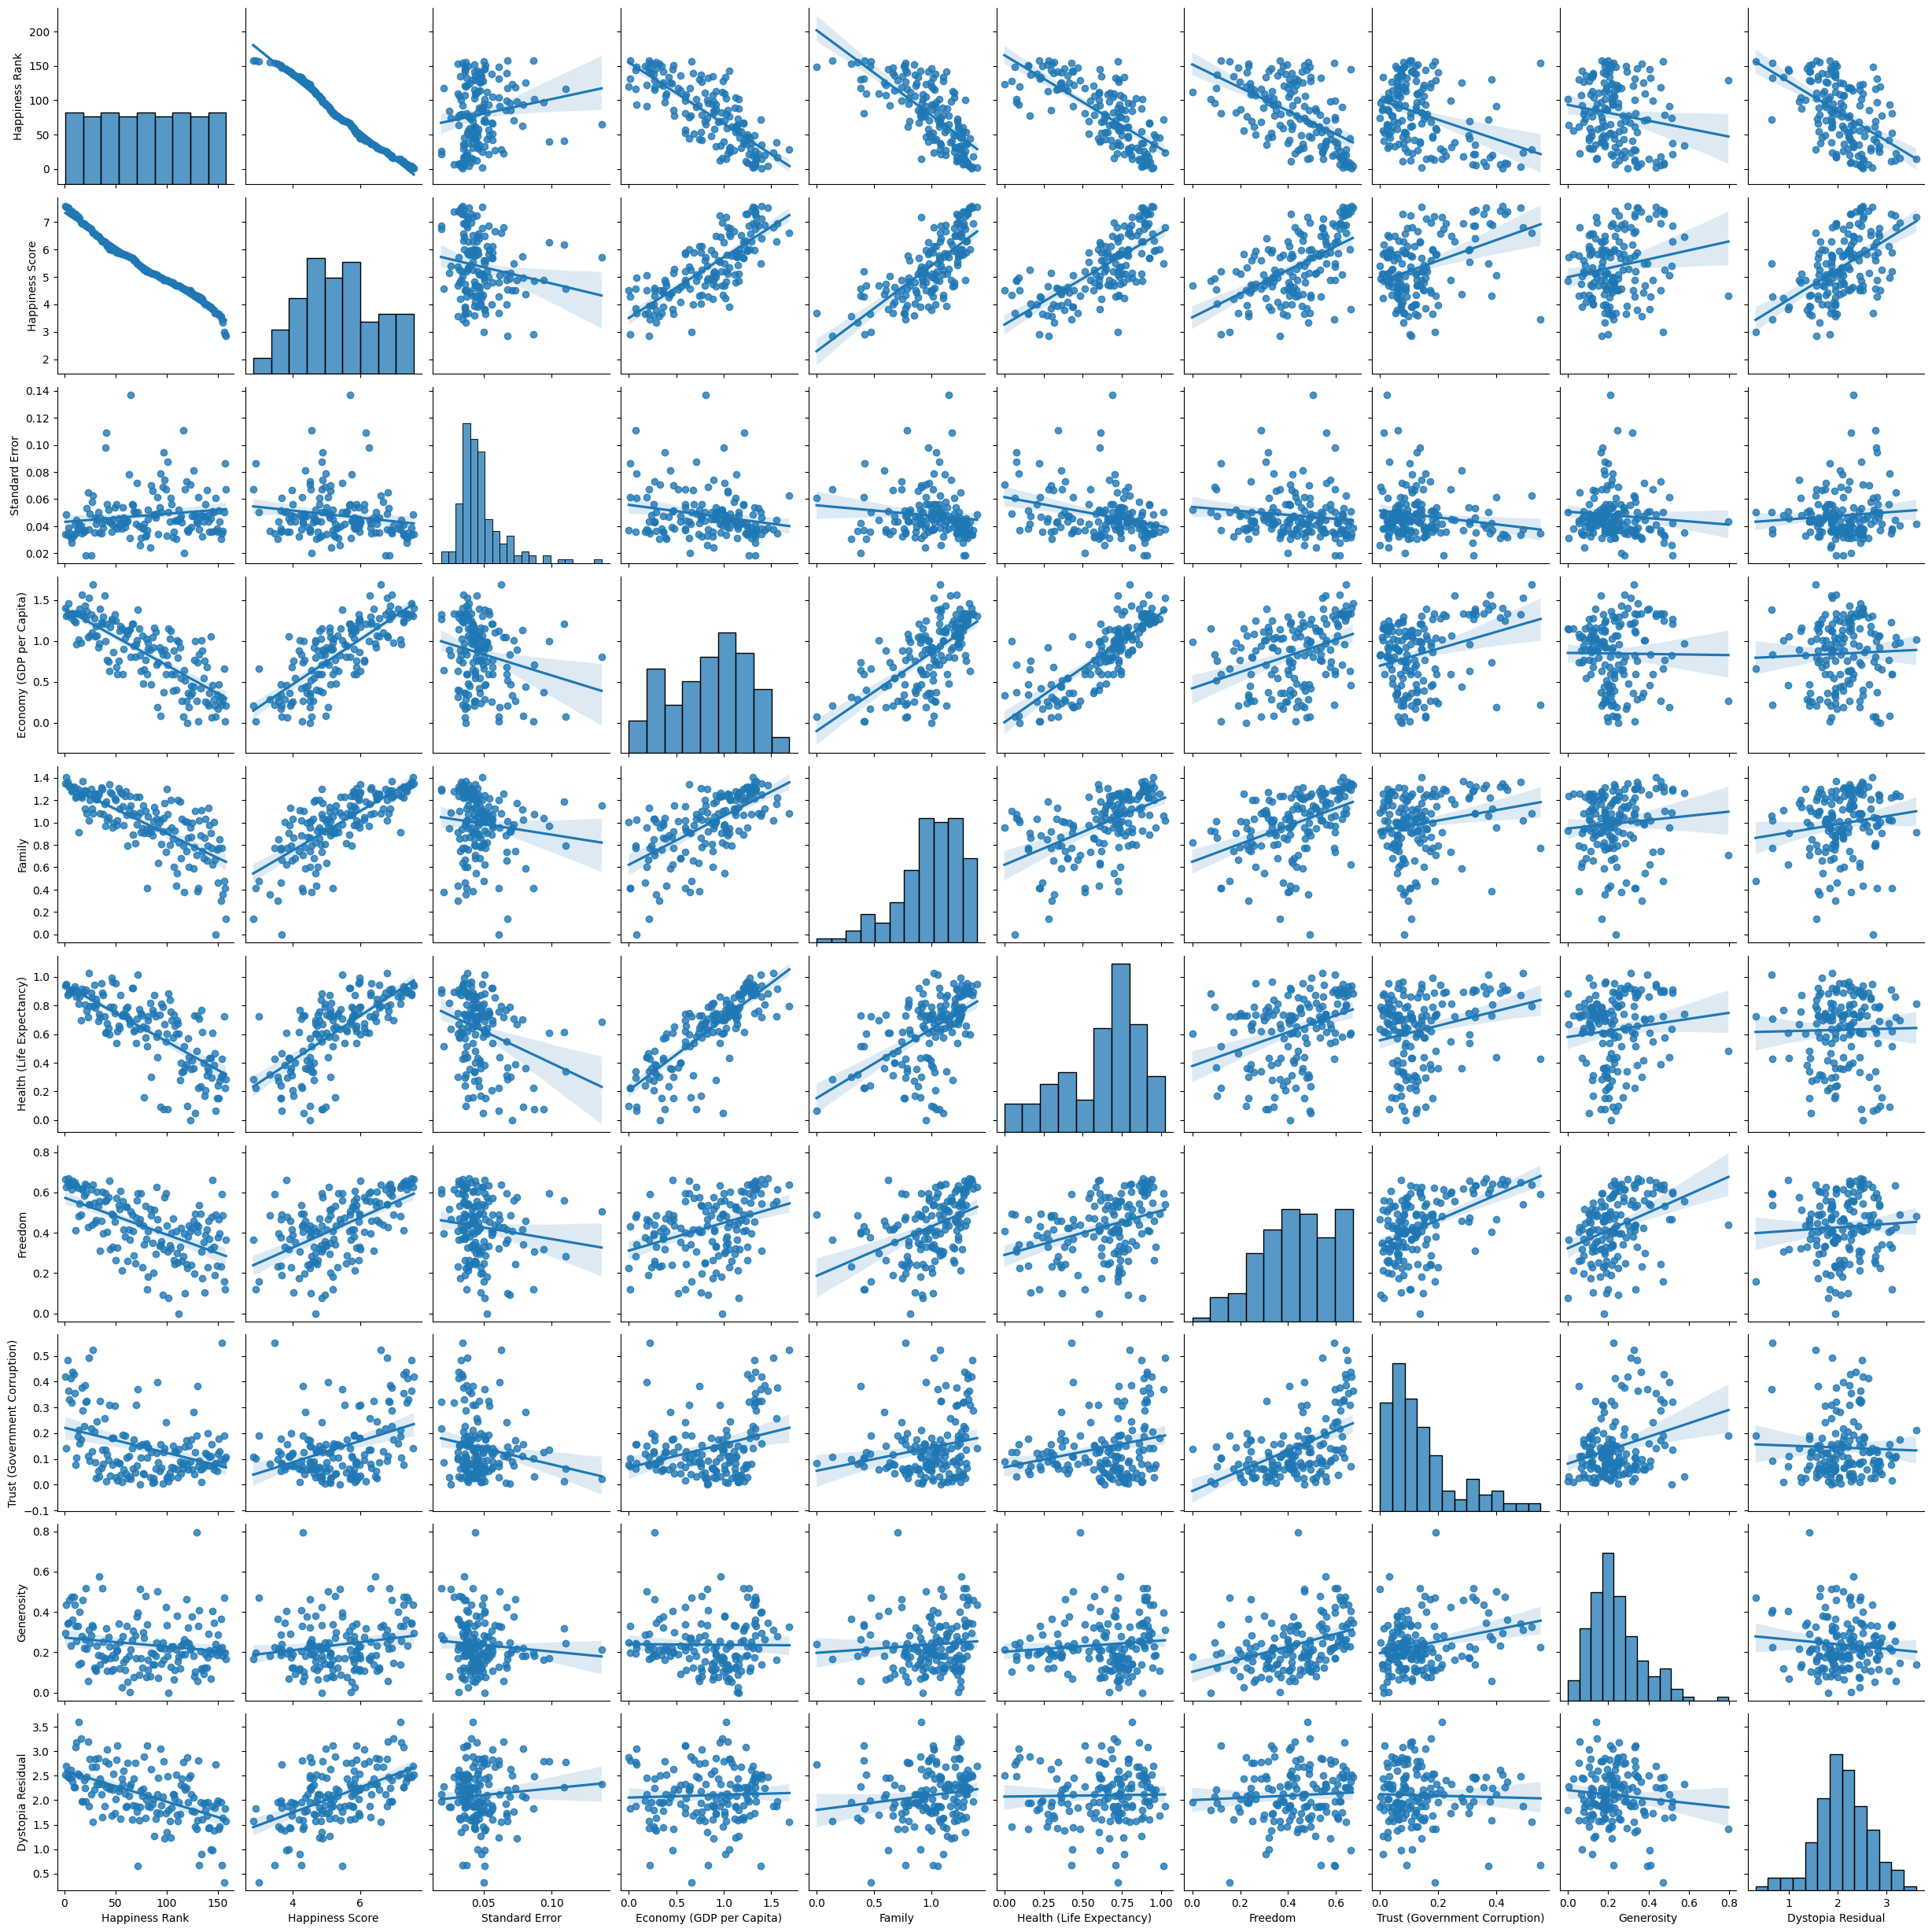

In [ ]:
sns.pairplot(df,kind ='reg')

<ipython-input-92-36e67b284f78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True )


<Axes: >

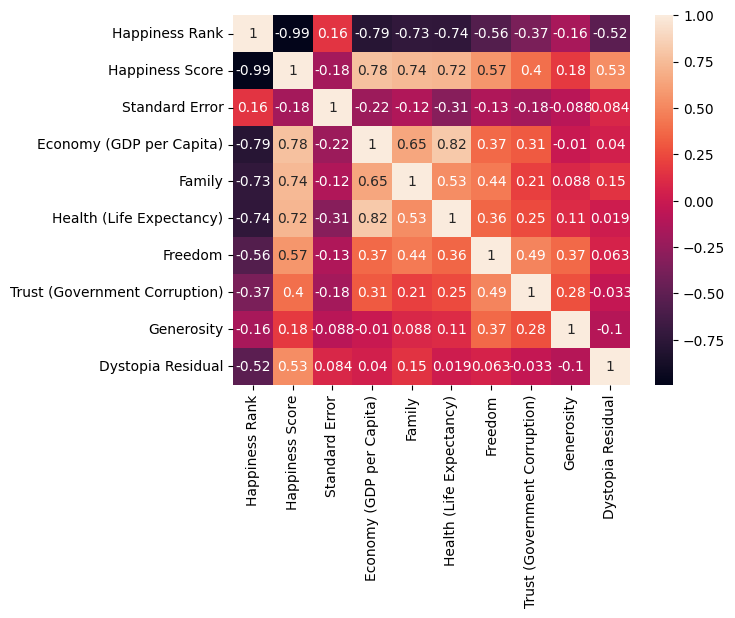

In [ ]:
sns.heatmap(df.corr(),annot = True )


> ### **Observations:**
  1. Happiness Score is Strongly Negatively correlated to Happiness rank (Understandable)
  2. Hapiness Score has high coorelations with features which cannot be droped
    - Economy (GDP per Capita)
    - Family
    - Health (Life Expectancy)
  3. Happiness score has moderate correlations with Freedom,Trust (Government Corruption) and Dystopia Residual which may or may not be dropped.
  4. Columns like Generosity and standard Error has very low correlation and can be dropped.






In [ ]:
df.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


# Data Preprocessing

In [ ]:
# Droping columns which are irrevalent for model training
df = df.drop(columns=['Country','Region','Happiness Rank','Generosity'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Getting Indedependent and Dependent features
x = df.drop(columns='Happiness Score',axis=1)
y = df['Happiness Score']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
}

# Train and evaluate each model
mse_scores = []
r2_scores = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(model_name)
    print("MSE:", mse)
    print("R-squared:", r2)
    print()

Linear Regression
MSE: 0.01397318192008965
R-squared: 0.9895007735451479

Ridge Regression
MSE: 0.018922174763296877
R-squared: 0.9857821791060695

Lasso Regression
MSE: 1.3747238629416834
R-squared: -0.03294562630451359

Elastic Net
MSE: 1.3747238629416834
R-squared: -0.03294562630451359

K-Nearest Neighbors Regression
MSE: 0.07330083800000001
R-squared: 0.9449229172071427

Decision Tree Regression
MSE: 0.18620242499999995
R-squared: 0.8600904620223333

Random Forest Regression
MSE: 0.07988147347250019
R-squared: 0.9399783324706285

Gradient Boosting Regression
MSE: 0.059255692528457325
R-squared: 0.9554762159289647

Support Vector Regression
MSE: 0.030296719409945806
R-squared: 0.9772355273306214



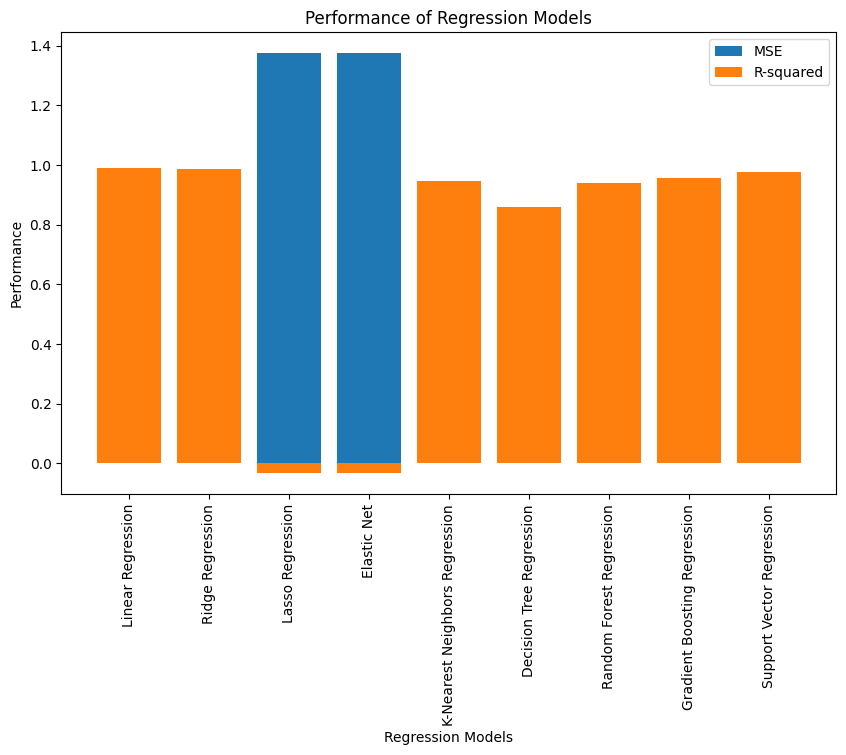

In [ ]:
# Plot performance metrics
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mse_scores, label='MSE')
plt.bar(models.keys(), r2_scores, label='R-squared')
plt.xlabel('Regression Models')
plt.ylabel('Performance')
plt.title('Performance of Regression Models')
plt.legend()
plt.xticks(rotation=90)
plt.show()

- Linear Regression works the best among all